<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S6_3_1_Trouver_un_visage_sur_une_photo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Placer le centre d'un visage avec FastAI

Nous allons continuer notre voyage dans la reconnaissance d'images en apprenant à un modèle comment nous pouvons lui faire détecter un visage sur une image. Pour cela, nous devrons utiliser des régressions 

1. Importez le module ```fastai.vision```

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

2. Nous allons importer le dataset ```URLs.BIWI_SAMPLE```

In [0]:
path = untar_data(URLs.BIWI_SAMPLE)

3. Regardez ce qu'il y a à l'intérieur de BIWI_SAMPLE 

In [8]:
path.ls()

[PosixPath('/root/.fastai/data/biwi_sample/images'),
 PosixPath('/root/.fastai/data/biwi_sample/centers.pkl')]

[PosixPath('/root/.fastai/data/biwi_sample/centers.pkl'),
 PosixPath('/root/.fastai/data/biwi_sample/images')]

4. Il va falloir que nous chargions le fichier ```pkl``` qui contient les coordonnées de nos images. Nous verrons plus en détail ce qu'est un fichier au format [pickle](https://docs.python.org/2/library/pickle.html). 

En attendant, vous pouvez utiliser le code suivant : 
```
pickle.load(open(biwi/'centers.pkl', "rb"))
```

In [0]:
fn2ctr = pickle.load(open(path/'centers.pkl', "rb"))

5. Cette fois, nous ne pourrons pas utiliser des ```DataBunch``` préfaits, nous devrons construire le notre. Passons en revue ce dont nous avons besoin : 

* Savoir quel type de problème nous gérons 
* Savoir comment nous splittons notre dataset 
* Savoir comment nous pouvons trouver les labels de nos items 
* Savoir comment nous pouvons nous servir de notre data augmentation pour améliorer l'entrainement 
* Savoir comment nous normalisons nos données 

In [0]:
data = (PointsItemList.from_folder(path)
        .split_by_rand_pct(seed =  42)
        .label_from_func(lambda o: fn2ctr[o.name])
        .transform(get_transforms(), tfm_y = True, size = (120, 160))
        .databunch()
        .normalize(imagenet_stats))

6. Regardez un batch de données 

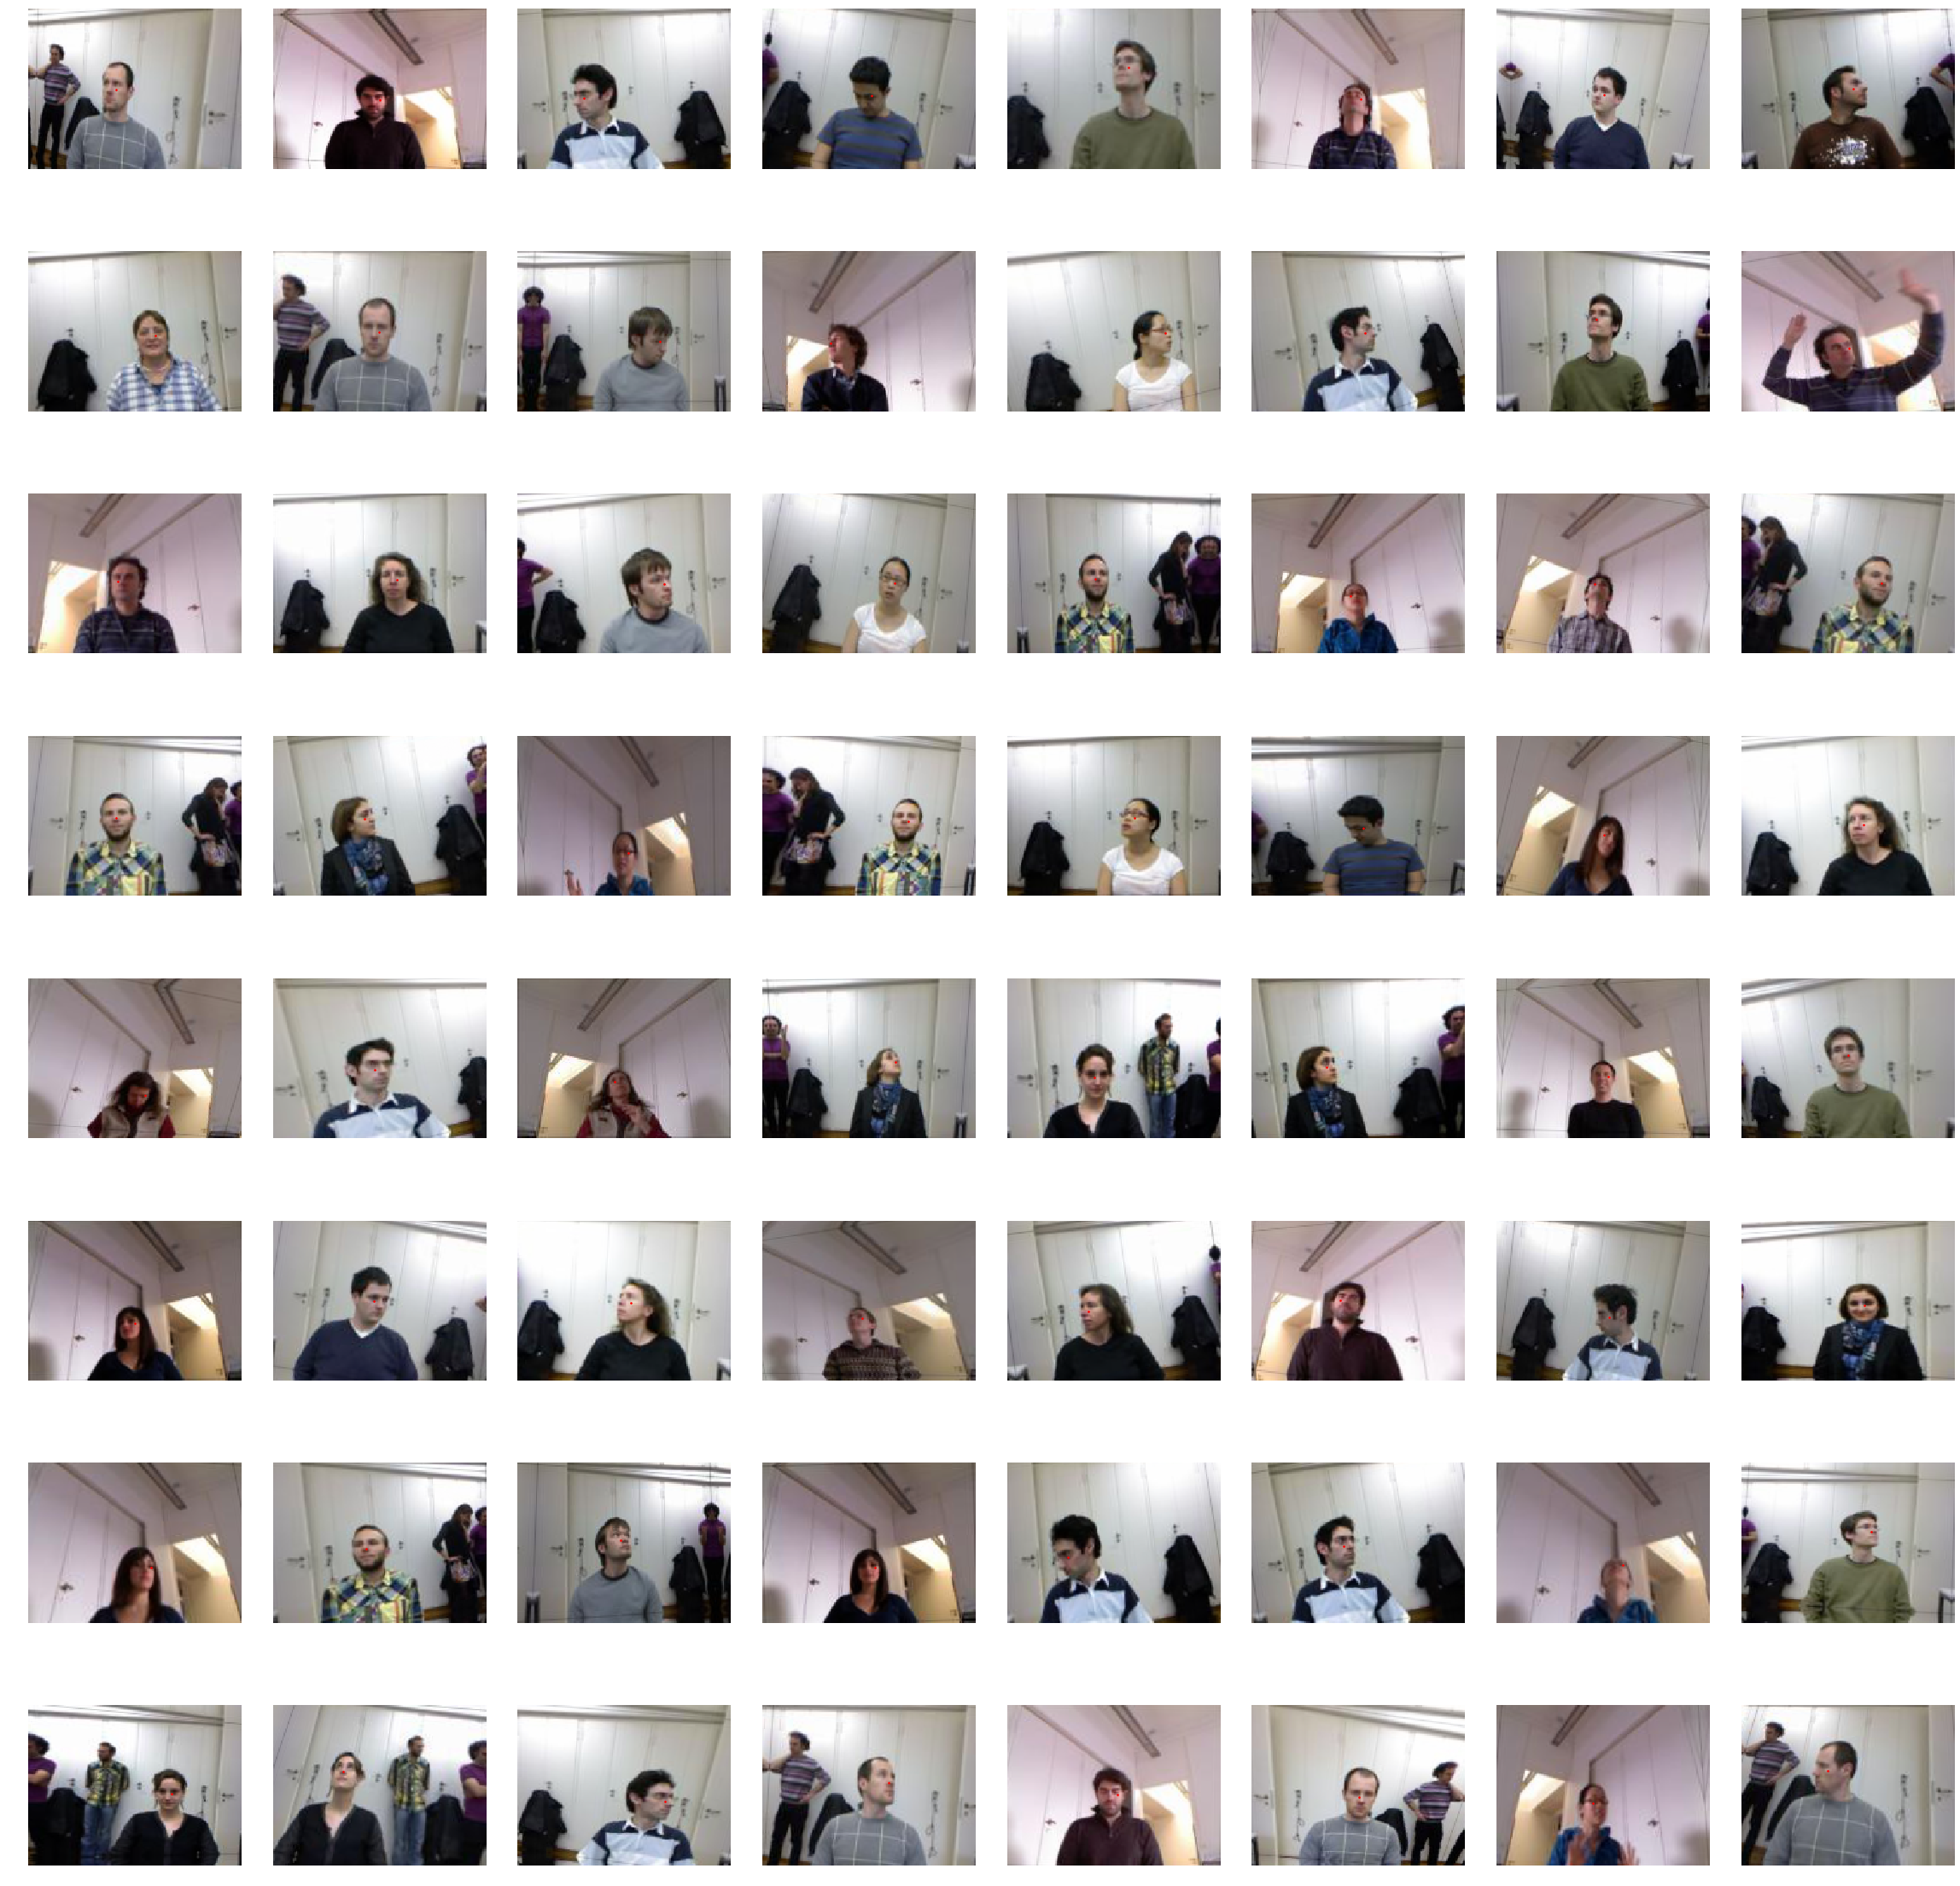

In [15]:
data.show_batch()

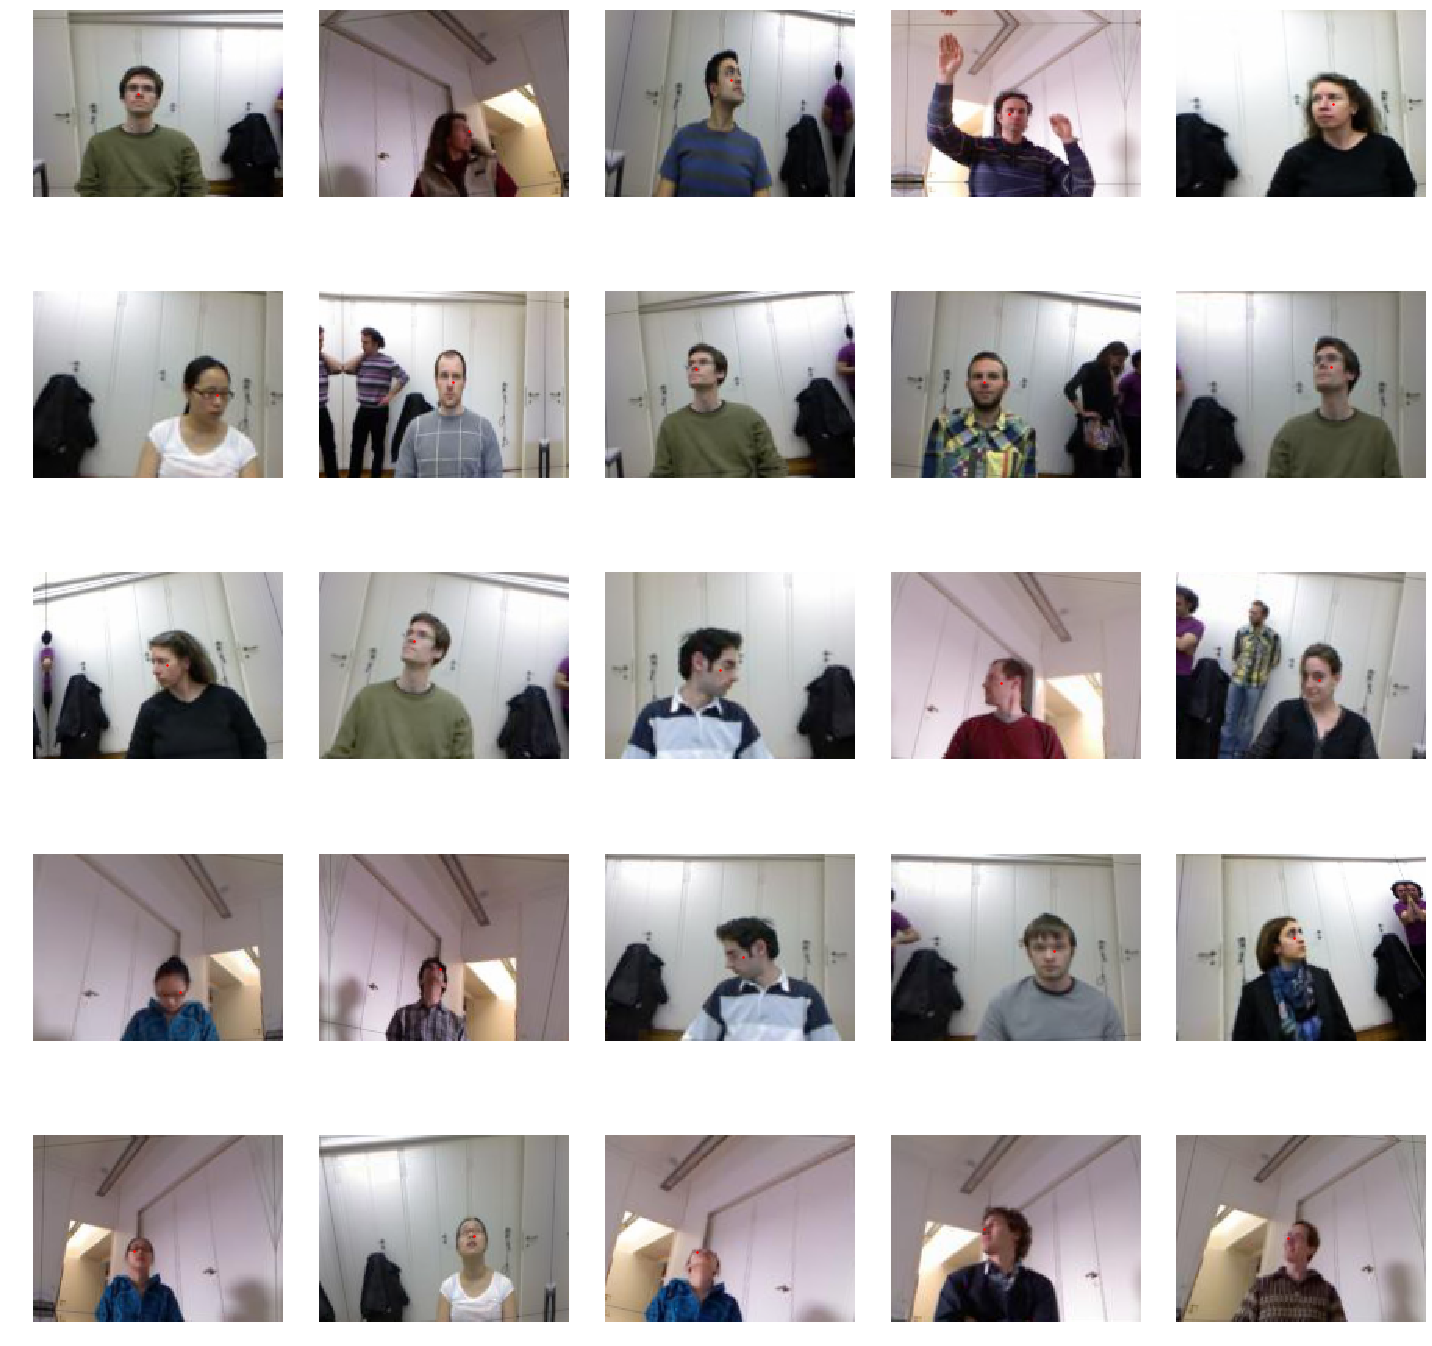

7. Entrainez un cnn_learner sur un modèle restnet18

In [31]:
learner = cnn_learner(data, models.alexnet, metrics=mean_squared_error)
learner.fit_one_cycle(10)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 233M/233M [00:04<00:00, 59.9MB/s]


8. Il semblerait que nous pourrions améliorer notre entrainement. Faisons un peu de fine-tuning sur notre learning rate

In [32]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.31E-02
Min loss divided by 10: 6.92E-03


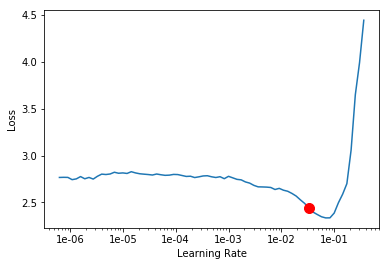

In [33]:
learner.recorder.plot(suggestion=True)

Min numerical gradient: 1.20E-03


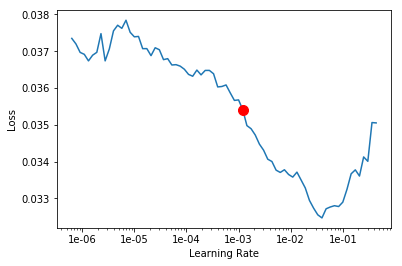

9. Entrainez à nouveau votre modèle avec le learning rate adéquate 

In [34]:
learner.fit_one_cycle(10, 3.31E-02)

10. Notre MSE semble avoir drastiquement baissée. Voyons ce qu'il en est sur quelques résultats 

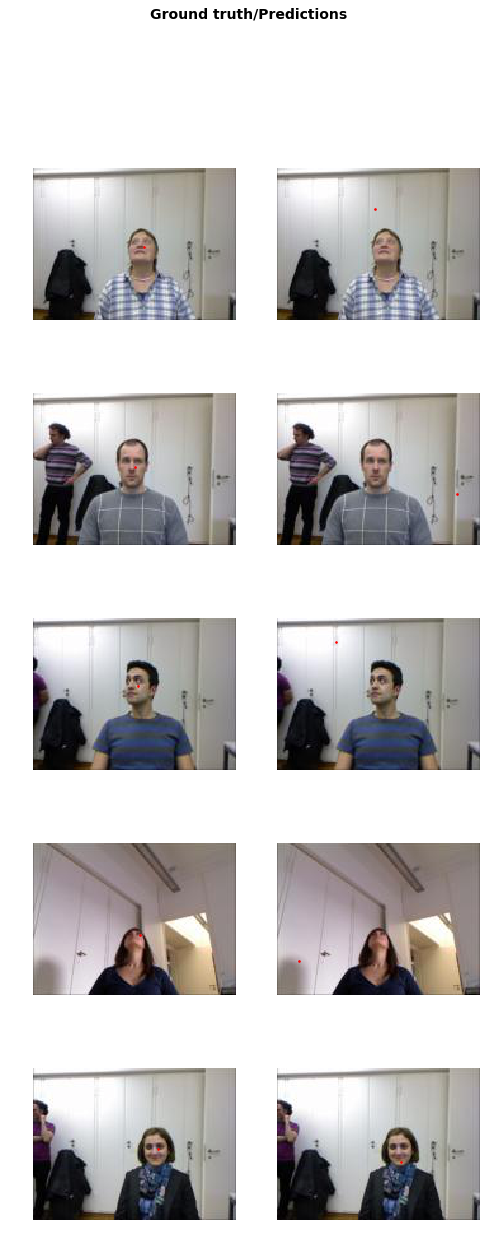

In [35]:
learner.show_results()

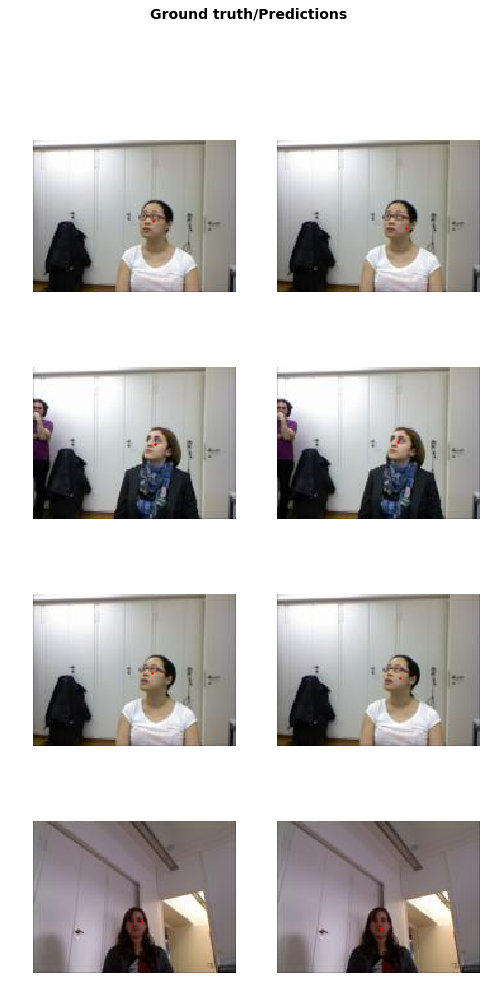